In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.io

In [10]:
def plotData():
    plt.figure(figsize=(8,6))
    plt.xlabel("Water flowing out of dam")
    plt.ylabel("Change of water level")
    plt.plot(X[:],y,"rx")
    plt.grid(True)

In [11]:
mat=scipy.io.loadmat("ex5data1.mat")
X=mat.get("X")
y=mat.get("y")
ytest=mat.get("yest")
yval=mat.get("yval")
Xtest=mat.get("Xtest")
Xval=mat.get("Xval")

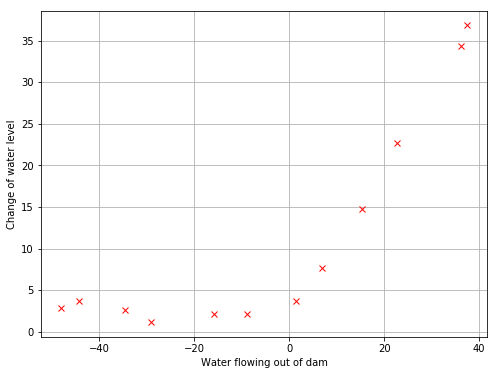

In [12]:
plotData()

In [25]:
def linearRegCostFunction(init_theta, X,y,reg):
    m=len(X)
    theta=init_theta[:,None]
    cost=(np.sum((np.dot(X,theta)-y)**2))*(1/(2*m))+ (reg/(2*m)*np.sum(theta**2))
    gradients=((np.sum((np.dot(X,theta)-y)*X,axis=0)/m)+(reg/m)*theta.T)
    gradients[0]=gradients[0]-(reg/m)*theta.T
    gradients=gradients.flatten()
    return (cost,gradients)

In [29]:
def trainLinearReg(X,y,reg):
    inital_theta=np.zeros(np.size(X,1))
    res=scipy.optimize.minimize(linearRegCostFunction,inital_theta,args=(X,y,reg),jac=True,
                options={'maxiter':400,"disp": True})
    return res.x

In [17]:
def learningCurve(X,y,Xval,yval,reg):
    m_train = len(X)
    m_val = len(Xval)
    error_train = np.zeros(m_train)
    error_val = np.zeros(m_train)
    for i in range(1,m_train+1):
        est_theta = trainLinearReg(X[0:i],y[0:i],reg)
        error_train[i-1] = (np.sum((np.dot(X[0:i],est_theta)-y[0:i])**2))/(2.0*i)
        error_val[i-1] = (np.sum((np.dot(Xval,est_theta)-yval)**2))/(2.0*m_val)

    return (error_train, error_val)

In [21]:
def polyFeatures(X,p):
    X_poly = np.zeros((len(X),p))
    X = X.flatten()
    for i in range(1,p+1):
        X_poly[:,i-1] = X**i
    return X_poly

def featureNormalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    normalized_X = np.divide(X - mu,sigma)
    return (normalized_X, mu, sigma)

In [19]:
def plotFit(min_x, max_x, mu, sigma, theta, p):
    x = np.arange(min_x - 15, max_x + 25, 0.05).reshape((-1,1))
    X_poly = polyFeatures(x,p)
    X_poly = np.divide(X_poly - mu, sigma)
    X_poly = np.hstack((np.ones(len(X_poly)).reshape((-1,1)),X_poly))
    plt.plot(x,np.dot(X_poly,theta),'b--',linewidth=2)
    return

def validationCurve(X, y, Xval, yval):
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]).reshape((-1,1))
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))
    for i in range(len(lambda_vec)):
        m_train = len(X)
        m_val = len(Xval)
        reg_param = lambda_vec[i]
        est_theta = trainLinearReg(X,y,reg_param)
        error_train[i] = (np.sum((np.dot(X,est_theta)-y)**2))/(2.0*m_train)
        error_val[i] = (np.sum((np.dot(Xval,est_theta)-yval)**2))/(2.0*m_val)

    return (lambda_vec, error_train, error_val)

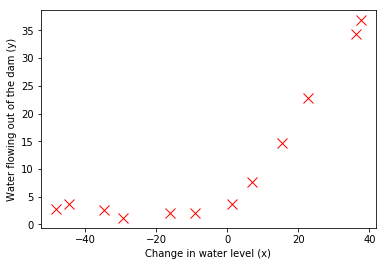

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5


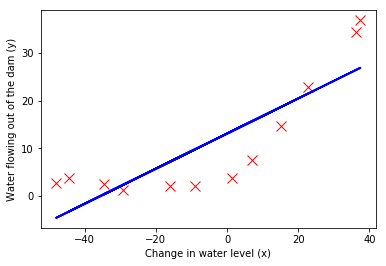

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 3
         Function evaluations: 5
         Gradient

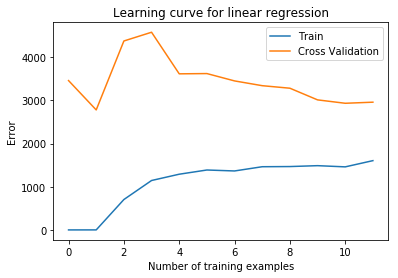

ValueError: all the input arrays must have same number of dimensions

In [30]:
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

# Regularized Cost
full_X = np.hstack((np.ones_like(y), X))
theta = np.array([1,1])
J, g = linearRegCostFunction(theta,full_X,y,0.0)

# Reguliarized Gradient
J, g = linearRegCostFunction(theta,full_X,y,1.0)

# Train Linear Regression
reg_param = 0
est_theta = trainLinearReg(full_X,y,reg_param)

# Plot linear fit 
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.plot(X,np.dot(full_X,est_theta),'b-',linewidth=2)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

# Learning Curve
reg_param = 0.0
full_Xval = np.hstack((np.ones_like(yval),Xval))
error_train, error_val = learningCurve(full_X,y,full_Xval,yval,reg_param)

plt.plot(range(len(X)), error_train, range(len(X)), error_val);
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()

# Feature Mapping for Polynomial Regression
p = 8
X_poly = polyFeatures(X,p)
X_poly, mu, sigma = featureNormalize(X_poly)
X_poly = np.hstack((np.ones_like(y),X_poly))

X_poly_test = polyFeatures(Xtest,p)
X_poly_test = np.divide(X_poly_test - mu, sigma)
X_poly_test = np.hstack((np.ones_like(ytest),X_poly_test))

X_poly_val = polyFeatures(Xval,p)
X_poly_val = np.divide(X_poly_val - mu, sigma)
X_poly_val = np.hstack((np.ones_like(yval),X_poly_val))

#Learning Curve for Polynomial Regression
reg_param = 1.0
est_theta = trainLinearReg(X_poly,y,reg_param)
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plotFit(np.min(X), np.max(X), mu, sigma, est_theta, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

error_train, error_val = learningCurve(X_poly,y,X_poly_val,yval,reg_param)

plt.plot(range(len(X)), error_train, range(len(X)), error_val);
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()

# Validation for selecting lambda
lambda_vec, error_train, error_val = validationCurve(full_X,y,full_Xval,yval)

plt.plot(lambda_vec, error_train, lambda_vec, error_val);
plt.title('Selecting \lambda using a cross validation set')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')
plt.show()